Read in the data.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def read_numbers_from_file(filename):
    with open(filename, 'r') as file:
        return [float(line.strip()) for line in file.readlines()]

# func to read and aggregate multiple files
def read_multiple_files(base_name, count):
    all_data = []
    for i in range(count):
        filename = f"{base_name}{i}.txt"
        all_data.append(read_numbers_from_file(filename))
    return all_data

# read nearests and furthests data
nearests_list = read_multiple_files('basicNearests', 5)
furthests_list = read_multiple_files('basicFurthests', 5)


Create histograms for each.

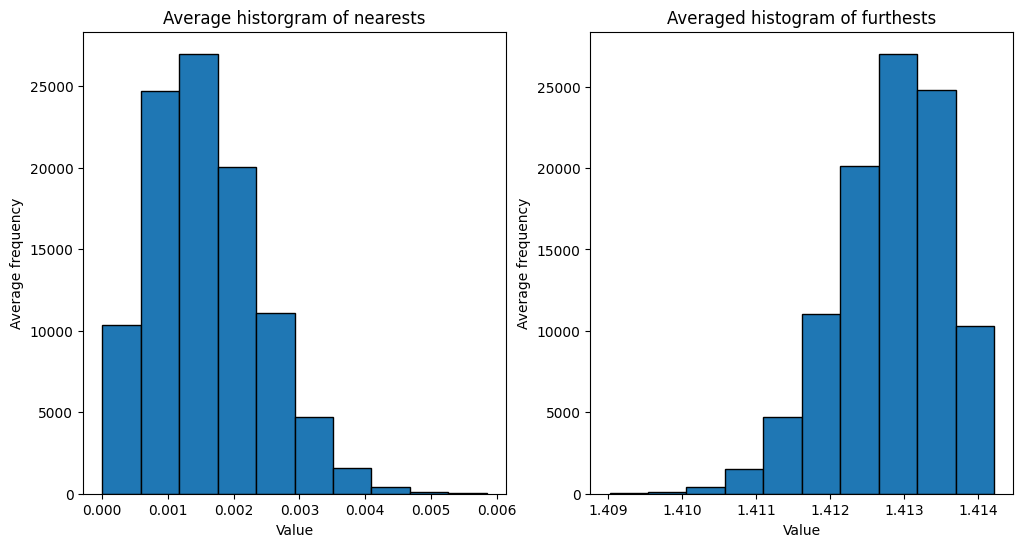

In [5]:
# func to calculate average frequencies
def average_histogram(data_list, bins):
    all_histograms = []
    for data in data_list:
        hist, bin_edges = np.histogram(data, bins=bins, range=(min(min(data_list)), max(max(data_list))))
        all_histograms.append(hist)
    avg_histogram = np.mean(all_histograms, axis=0)
    return avg_histogram, bin_edges

# num histogram bins
bins = 10

avg_nearests, bin_edges_nearests = average_histogram(nearests_list, bins)
avg_furthests, bin_edges_furthests = average_histogram(furthests_list, bins)

# plot histograms
plt.figure(figsize=(12, 6))

# for nearests
plt.subplot(1, 2, 1)
plt.bar(bin_edges_nearests[:-1], avg_nearests, width=np.diff(bin_edges_nearests), edgecolor='black', align='edge')
plt.title('Average historgram of nearests')
plt.xlabel('Value')
plt.ylabel('Average frequency')

# for furthests
plt.subplot(1, 2, 2)
plt.bar(bin_edges_furthests[:-1], avg_furthests, width=np.diff(bin_edges_furthests), edgecolor='black', align='edge')
plt.title('Averaged histogram of furthests')
plt.xlabel('Value')
plt.ylabel('Average frequency')

plt.show()